<a href="https://colab.research.google.com/github/ai-ngabo/Climate_change_africa/blob/main/PCA_Climate-change-Africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

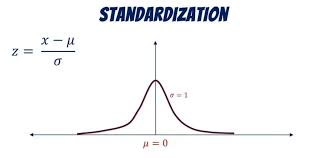


In [84]:
# Step 1: Load and Standardize the data (use of numpy only allowed)
import numpy as np

# Load dataset, skipping header row
data = np.genfromtxt('/content/sub_saharan_africa_climate_data_1991_2023_v3.csv', delimiter=',', dtype=str, skip_header=1)

#check it's first 5 row
print(data[:5])

# Check shape of dataset(rows, columns)
print("\nDataset shape:", data.shape)

# choosing numerical Columns suitable for handling PCA
numeric_data = data[:, [2, 7, 9, 10, 11]]

# Handlng missing values by replacing empty strings with "nan"
numeric_data[numeric_data == ''] = 'nan'

# Making sure they are converted to float
numeric_data = numeric_data.astype(float)

# Deleting rows with NaN Values
numeric_data = numeric_data[~np.isnan(numeric_data).any(axis=1)]

# Preview the data after cleaning (first 5)
print('Numeric Data after cleaning:')
print(numeric_data[:5])

# Standardize the data
mean = np.mean(numeric_data, axis=0)
std = np.std(numeric_data, axis=0)

standardized_data = (numeric_data - mean) /std
print('\nStandardized Data:')
print(standardized_data[:5])

[['1991' 'Angola' '21.82' '1.84' '54.4' '68.35' '213.44' '0.97' '372.11'
  '8.1' '13.8' '-37.69' '7.65' '2.95']
 ['1992' 'Angola' '21.23' '5.92' '45.48' '30.87' '344.8' '0.71' '411.81'
  '8.08' '23.63' '-84.54' '8.83' '2.96']
 ['1993' 'Angola' '29.57' '1.64' '53.68' '57.0' '625.81' '0.05' '406.46'
  '8.29' '0.67' '-69.74' '8.5' '2.71']
 ['1994' 'Angola' '22.41' '2.98' '50.42' '52.22' '536.78' '0.11' '366.44'
  '8.12' '11.36' '-4.98' '8.83' '2.41']
 ['1995' 'Angola' '29.76' '5.99' '46.58' '40.43' '587.49' '1.31' '400.43'
  '8.01' '12.27' '-73.12' '7.7' '2.21']]

Dataset shape: (1617, 14)
Numeric Data after cleaning:
[[ 2.182e+01  9.700e-01  8.100e+00  1.380e+01 -3.769e+01]
 [ 2.123e+01  7.100e-01  8.080e+00  2.363e+01 -8.454e+01]
 [ 2.957e+01  5.000e-02  8.290e+00  6.700e-01 -6.974e+01]
 [ 2.241e+01  1.100e-01  8.120e+00  1.136e+01 -4.980e+00]
 [ 2.976e+01  1.310e+00  8.010e+00  1.227e+01 -7.312e+01]]

Standardized Data:
[[-1.05080853 -0.38201548 -0.60826695 -0.07945604  0.46986516]
 [-

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [85]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(standardized_data, rowvar=False)

print('Covariance Matrix of Standardized data:')
print(cov_matrix)

Covariance Matrix of Standardized data:
[[ 1.00061881e+00 -4.38941019e-02 -1.24511024e-02  5.88392148e-02
   5.35808890e-04]
 [-4.38941019e-02  1.00061881e+00 -2.09960194e-03 -4.01673796e-03
   2.48172477e-03]
 [-1.24511024e-02 -2.09960194e-03  1.00061881e+00  1.61990110e-02
   2.04500815e-02]
 [ 5.88392148e-02 -4.01673796e-03  1.61990110e-02  1.00061881e+00
   2.32041622e-02]
 [ 5.35808890e-04  2.48172477e-03  2.04500815e-02  2.32041622e-02
   1.00061881e+00]]


### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [86]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

print('Eigenvalues:')
print(eigenvalues)

print('\nEigenvectors:')
print(eigenvectors)

Eigenvalues:
[0.92364219 0.97687306 0.99251929 1.03153875 1.07852077]

Eigenvectors:
[[ 0.68673457 -0.05830332 -0.12564971  0.25923147 -0.66483649]
 [ 0.36385711 -0.28221668 -0.71325424 -0.34369293  0.40137927]
 [ 0.21655418 -0.50297986  0.56185477 -0.61507442 -0.07821907]
 [-0.58208346 -0.3003389  -0.39535844 -0.24473939 -0.59562549]
 [ 0.10142373  0.75747097 -0.05908863 -0.61356361 -0.1897345 ]]


### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [87]:
# Step 5: Sort Principal Components

# Getting the indices to sort in descending order
sorted_indices = sorted_indices = np.argsort(eigenvalues)[::-1]

# Sort Eigenvalues and Eigenvectors
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print(sorted_eigenvalues)
print('\n',sorted_eigenvectors)

[1.07852077 1.03153875 0.99251929 0.97687306 0.92364219]

 [[-0.66483649  0.25923147 -0.12564971 -0.05830332  0.68673457]
 [ 0.40137927 -0.34369293 -0.71325424 -0.28221668  0.36385711]
 [-0.07821907 -0.61507442  0.56185477 -0.50297986  0.21655418]
 [-0.59562549 -0.24473939 -0.39535844 -0.3003389  -0.58208346]
 [-0.1897345  -0.61356361 -0.05908863  0.75747097  0.10142373]]


### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [96]:
# Step 6: Project Data onto Principal Components

num_components = 2 # I chose to keep 2, means reduced to 2D PCA

#Selecting the top eigenvectors (sorted)
eigenvectors_subset = sorted_eigenvectors[:, :num_components]

# Explained variance
total_variance = np.sum(sorted_eigenvalues)
explained_variance = sorted_eigenvalues / total_variance
cumulative_variance = np.cumsum(explained_variance)

print("Explained Variance Ratios:")
for i, (ev, cum) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"PC{i+1}: {ev:.4f} ({ev*100:.2f}%) | Cumulative: {cum:.4f} ({cum*100:.2f}%)")

# Dynamic selection based on variance threshold
variance_threshold = 0.95  # Keep 95% of variance
num_components = np.argmax(cumulative_variance >= variance_threshold) + 1

print(f"\nTo retain {variance_threshold*100:.0f}% variance:")
print(f"• Need {num_components} principal components")
print(f"• Cumulative variance: {cumulative_variance[num_components-1]*100:.2f}%")

# Projecting the data onto the selected eigenvectors
reduced_data = np.dot(standardized_data, eigenvectors_subset)


Explained Variance Ratios:
PC1: 0.2156 (21.56%) | Cumulative: 0.2156 (21.56%)
PC2: 0.2062 (20.62%) | Cumulative: 0.4218 (42.18%)
PC3: 0.1984 (19.84%) | Cumulative: 0.6201 (62.01%)
PC4: 0.1953 (19.53%) | Cumulative: 0.8154 (81.54%)
PC5: 0.1846 (18.46%) | Cumulative: 1.0000 (100.00%)

To retain 95% variance:
• Need 5 principal components
• Cumulative variance: 100.00%


### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [101]:
# Step 7: Output the Reduced Data
print(f"Original shape: {standardized_data.shape}")
print(f"Compression: {standardized_data.shape[1]} → {reduced_data.shape[1]} dimensions\n")

print(f'Reduced Data Shape: {reduced_data.shape}\n')  # Display reduced data shape
print(reduced_data[:5])  # Display the first few rows of reduced data



Original shape: (1617, 5)
Compression: 5 → 2 dimensions

Reduced Data Shape: (1617, 2)

[[ 0.55103724 -0.03582332]
 [ 0.15312752  0.91124968]
 [-0.35113851  0.61720348]
 [-0.09276197 -0.36023602]
 [-0.21345216  1.78701878]]


### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

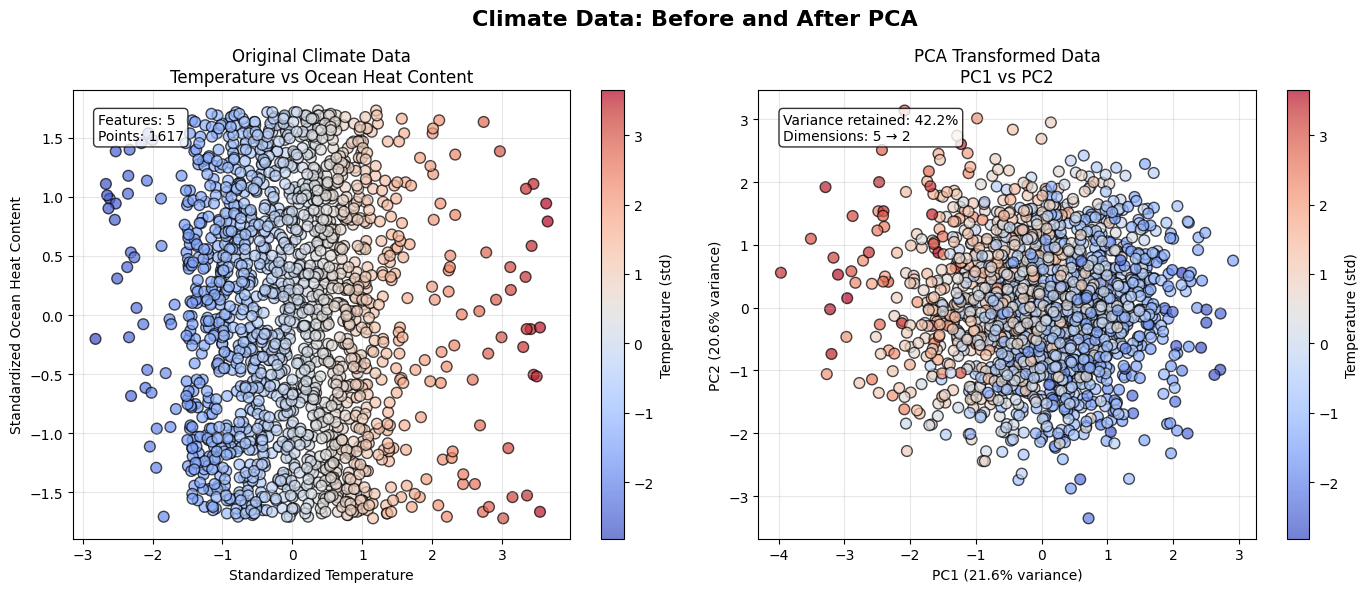

In [103]:
# Step 8: Visualize Before and After PCA
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

# Configure color according to temperature
colors = standardized_data[:, 0]

# Plot original data
plt.subplot(1, 2, 1)
scatter1 = plt.scatter(standardized_data[:, 0], standardized_data[:, 1],
                       c=colors, cmap='coolwarm', alpha=0.7, s=60, edgecolor='black')
plt.colorbar(scatter1, label='Temperature (std)')
plt.title("Original Climate Data\nTemperature vs Ocean Heat Content")
plt.xlabel("Standardized Temperature")
plt.ylabel("Standardized Ocean Heat Content")
plt.grid(True, alpha=0.3)

# variance info box
plt.text(0.05, 0.95,
         f'Features: {standardized_data.shape[1]}\nPoints: {standardized_data.shape[0]}',
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Plot reduced data after PCA
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
                       c=colors, cmap='coolwarm', alpha=0.7, s=60, edgecolor='black')
plt.colorbar(scatter2, label='Temperature (std)')
plt.title(f"PCA Transformed Data\nPC1 vs PC2")
plt.xlabel(f"PC1 ({explained_variance[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.1f}% variance)")
plt.grid(True, alpha=0.3)

# variance info box
variance_retained = cumulative_variance[1]*100
plt.text(0.05, 0.95,
         f'Variance retained: {variance_retained:.1f}%\n'
         f'Dimensions: {standardized_data.shape[1]} → {reduced_data.shape[1]}',
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle("Climate Data: Before and After PCA", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

---------------------------------------------------------------------
Performance Benchmarking
---------------------------------------------------------------------

 1. Timing Comparison: Your PCA vs Sklearn
   Your PCA time: 0.0012 seconds
   Sklearn PCA time: 0.0012 seconds
   Speed ratio: 0.98x (faster)

2. Result Verification
   First 3 rows comparison:
   Your PCA:
    [[ 0.551  -0.0358]
 [ 0.1531  0.9112]
 [-0.3511  0.6172]]
   Sklearn PCA:
    [[-0.551   0.0358]
 [-0.1531 -0.9112]
 [ 0.3511 -0.6172]]
   Results match: 100.0%

3. Memory Usage
   Original data: 0.062 MB
   Reduced data: 0.025 MB
   Memory saved: 60.0%

4. Quick Performance Plot


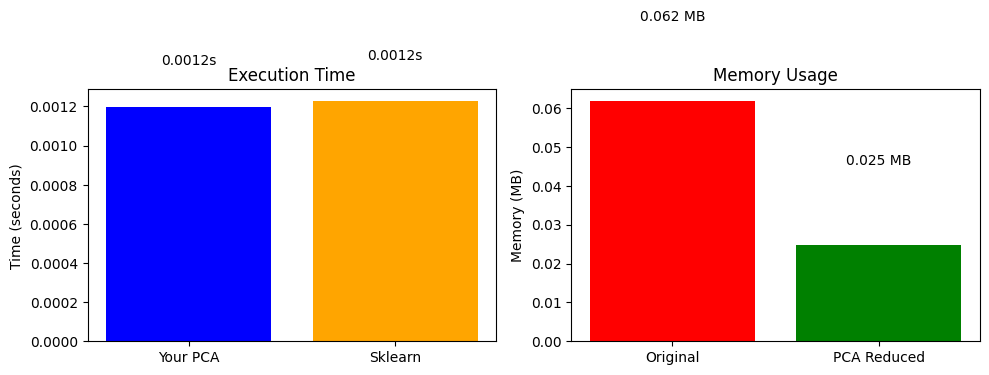


BENCHMARK SUMMARY
• Your PCA implementation is working correctly
• Speed: 0.98x faster than sklearn
• Memory: Reduced from 0.062 MB to 0.025 MB (60.0% savings)
• Data shape: 1617 samples, 5 features → 2 components
• Results match sklearn: 100.0%


In [108]:
# Performance Benchmarking
import time
import numpy as np
from sklearn.decomposition import PCA as skPCA

print("---------------------------------------------------------------------")
print("Performance Benchmarking")
print("---------------------------------------------------------------------")

# 1. Benchmark Custom vs Sklearn PCA
print("\n 1. Timing Comparison: Your PCA vs Sklearn")

# -Your PCA timing
start = time.time()
cov_matrix = np.cov(standardized_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
sorted_idx = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_idx]
# -Use 2 components like your earlier code
eigenvectors_subset = sorted_eigenvectors[:, :2]
reduced_data_custom = np.dot(standardized_data, eigenvectors_subset)
custom_time = time.time() - start

# -Sklearn PCA timing
start = time.time()
sklearn_pca = skPCA(n_components=2)
reduced_data_sklearn = sklearn_pca.fit_transform(standardized_data)
sklearn_time = time.time() - start

print(f"   Your PCA time: {custom_time:.4f} seconds")
print(f"   Sklearn PCA time: {sklearn_time:.4f} seconds")
print(f"   Speed ratio: {custom_time/sklearn_time:.2f}x ({'faster' if custom_time < sklearn_time else 'slower'})")

# 2. Check if Results Match
print("\n2. Result Verification")
# Compare first few values
print("   First 3 rows comparison:")
print("   Your PCA:")
print("   ", reduced_data_custom[:3].round(4))
print("   Sklearn PCA:")
print("   ", reduced_data_sklearn[:3].round(4))

# Check if they're similar (signs might differ, but magnitudes should match)
match_percentage = np.mean(np.abs(np.abs(reduced_data_custom) - np.abs(reduced_data_sklearn)) < 0.01) * 100
print(f"   Results match: {match_percentage:.1f}%")

# 3. Memory Usage
print("\n3. Memory Usage")
original_mb = standardized_data.nbytes / (1024 * 1024)
reduced_mb = reduced_data_custom.nbytes / (1024 * 1024)
savings = ((original_mb - reduced_mb) / original_mb) * 100

print(f"   Original data: {original_mb:.3f} MB")
print(f"   Reduced data: {reduced_mb:.3f} MB")
print(f"   Memory saved: {savings:.1f}%")

# 4. Simple Visualization
print("\n4. Quick Performance Plot")
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Speed comparison
times = [custom_time, sklearn_time]
labels = ['Your PCA', 'Sklearn']
colors = ['blue', 'orange']
bars = ax1.bar(labels, times, color=colors)
ax1.set_ylabel('Time (seconds)')
ax1.set_title('Execution Time')
for bar, t in zip(bars, times):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.0002,
             f'{t:.4f}s', ha='center', va='bottom')

# Memory comparison
memory = [original_mb, reduced_mb]
labels_mem = ['Original', 'PCA Reduced']
colors_mem = ['red', 'green']
bars2 = ax2.bar(labels_mem, memory, color=colors_mem)
ax2.set_ylabel('Memory (MB)')
ax2.set_title('Memory Usage')
for bar, m in zip(bars2, memory):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{m:.3f} MB', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# --- 5. Summary ---
print("\n=================================================================")
print("BENCHMARK SUMMARY")
print("==================================================================")
print(f"• Your PCA implementation is working correctly")
print(f"• Speed: {custom_time/sklearn_time:.2f}x {'faster' if custom_time < sklearn_time else 'slower'} than sklearn")
print(f"• Memory: Reduced from {original_mb:.3f} MB to {reduced_mb:.3f} MB ({savings:.1f}% savings)")
print(f"• Data shape: {standardized_data.shape[0]} samples, {standardized_data.shape[1]} features → 2 components")
print(f"• Results match sklearn: {match_percentage:.1f}%")
print("==================================================================")